# Evaluacion de la ecuacion de calor con coeficientes variables.

La ecuacion de calor con coeficientes variables es:

$$\frac{\partial u}{\partial t} - \frac{\partial}{\partial x} \left [  \alpha(x) \frac{\partial u}{\partial x} \right ] = g(x,t)$$

Si expandimos estas derivadas


$$ \frac{\partial u }{\partial t} - \alpha(x) \frac{\partial^2 u}{\partial x^2} - \frac{\partial \alpha(x)}{\partial x} \frac{\partial u}{\partial x} = g(x).$$


Comenzamos por la derivada de con respecto a $t$


$$\frac{\partial u}{\partial t} = \frac{w_{i j+1} - w_{ij}}
{\Delta t} + \mathcal{O}(\Delta t) .$$

Ahora para las derivadas espaciales centradas.










$$\alpha(x) \frac{u(x + \Delta x, t) - 2 u(x,t) + u(x - \Delta x, t)}{\Delta x^2} - \frac{\alpha(x + \Delta x)- \alpha(x - \Delta x)}{2 \Delta x}  \frac{u(x + \Delta x, t) - u(x - \Delta x, t)}{2 \Delta x} + \mathcal{O}(\Delta x^2)$$

En terminos de $w$ (las de $x$)

$$\alpha_i \frac{w_{i+1 j} - 2 w_{ij} + u_{i-1 j}}{\Delta x^2} - \frac{(\alpha_{i+1} - \alpha_{i-1})(w_{i+1 j} - w_{i-1 j})}{4 \Delta x^2} $$

De forma que encontramos



$$w_{i j+1} = \gamma_i ( w_{i+1 j} - 2 w_{ij} + w_{i-1 j}) - \frac{(\gamma_{i+1}-\gamma_{i-1})(w_{i+1 j} - w_{i-1 j})}{4} + w_{ij} + g_{ij} \Delta t$$
donde $\gamma_i = \alpha_i \Delta t/\Delta x^2$

El analisis de estabilidad en estos metodos es muy dificil por ser los coeficientes variables. Si $\alpha$ esta acotado, por ejemplo $\alpha(x) < M$, $x \in [a,b]$
podemos escojer $\gamma = 1/2$ y


$$\Delta t \le \frac{\Delta x^2}{2 M} $$

# Diferencias finitas regresivas en tiempo y centradas en espacio.

Tenemos

$$u_t(x_i, t_j) = \frac{u(x_i, t_j) - u(x_i, t_j - \Delta t)}{\Delta t} .$$

La parte espacial queda igual.
Quedamos con

$$ \frac{w_{ij} - w_{i j-1}}{\Delta t} = \alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2}  + \mathcal{O}(\Delta t) + \mathcal{O}(\Delta x^2).$$

Agrupamos. De forma que los indices $j$ estan a la izquierda y los $j-1$ a la derecha.

$$(1 + 2 \gamma) w_{ij} - \gamma(w_{i+1 j} + w_{i-1 j}) = w_{i j-1}, \quad j=1,2, \cdots, nt \quad , \quad i=1, \cdots, nx-1 $$



donde $\gamma = \alpha \Delta t/\Delta x^2$.

En la expresion anterior ordenemos los terminos de forma ascendente para el indice $i$.

$$-\gamma w_{i-1 j} + (1 + 2 \gamma) w_{ij} - \gamma w_{i+1 j} = w_{i j-1} $$


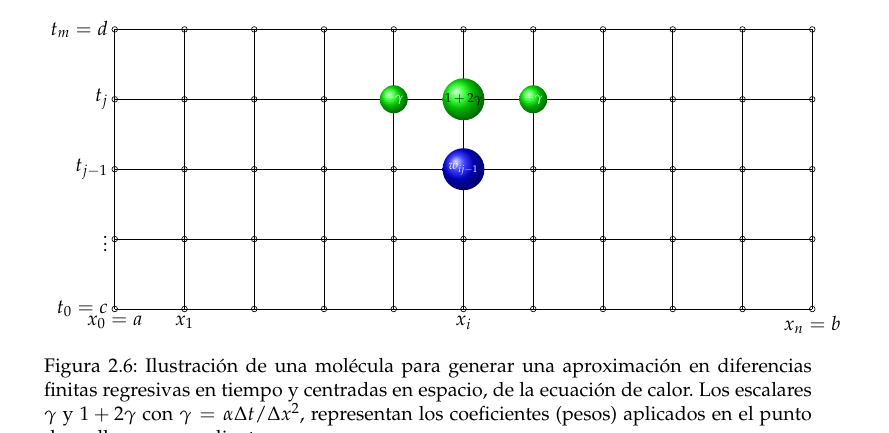    

Arriba mostramos la estrella.

Para la evaluacion requerimos las condiciones iniciales y
de frontera. El primer $j$ lo evaluamos en $j=1$.

$$-\gamma w_{i-1 1} + (1 + 2 \gamma) w_{i1} - \gamma w_{i+1 1} = w_{i 0} $$

donde
$$w_{i0} = u(x_i, t_0)=I_0(x_i) \quad , \quad w_{01} = h_1(t_1) \quad , \quad w_{n1} = h_2(t_1) $$

Para $i=1, j=1$

$$-\gamma w_{0 j} + (1 + 2 \gamma) w_{1j} - \gamma w_{2 j} = w_{1 j-1} $$

$$ (1 + 2 \gamma) w_{11} - \gamma w_{2 j} = w_{1 0} + \gamma w_{01}$$

En general

$$-\gamma w_{i-1 j} + (1 + 2 \gamma) w_{ij} - \gamma w_{i+1 j} = w_{i j-1}  \quad i=1, \cdots, n-1$$
$$w_{0j} = h_1(t_j) , w_{nj} = h_2(t_j) $$

Para el caso $i=n-1$,


$$-\gamma w_{n-2 j} + (1 + 2 \gamma) w_{n-1j} - \gamma w_{n j} = w_{n-1 j-1} $$

El sistema matricial queda






El sistema matricial queda

$$\begin{pmatrix}
1 + 2 \gamma  & - \gamma & 0 & \cdots & \cdots & 0  \\
-\gamma & 1+  2 \gamma  & - \gamma &  \ddots & \vdots & 0  \\
0 & \ddots & \ddots & \ddots & \ddots & 0  \\
0 & \cdots & \cdots & 0 & - \gamma & 1 + 2 \gamma
\end{pmatrix}
\begin{pmatrix}
w_{1j} \\ w_{2j} \\ \vdots  \\ w_{n-2 j} \\ w_{n-1 j}
\end{pmatrix}
=
\begin{pmatrix}
w_{1 j-1 } \\
w_{2 j-1 } \\
\vdots \\
w_{n-1 j_1}
\end{pmatrix}
+ \gamma
\begin{pmatrix}
w_{0j} \\
0 \\
\vdots \\
0 \\
w_{nj}
\end{pmatrix}
.$$

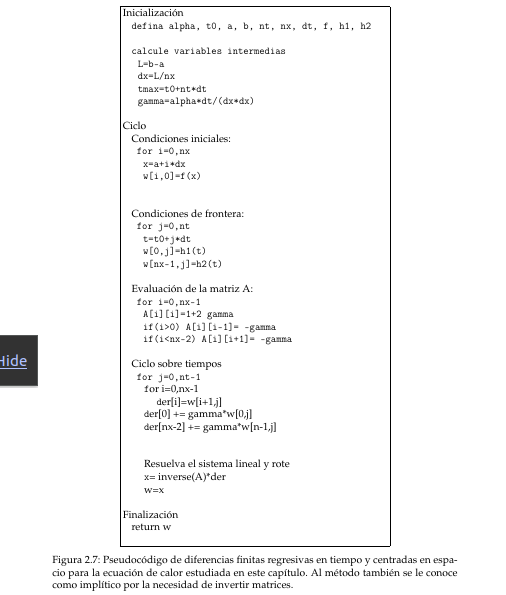

# Solucion de la ecuacion de calor. Metodo Implicito

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from numpy import linalg

def solu_eq_calor_implicit(alpha, t0, a, b, nt, nx, dt, f):
    L=b-a
    dx=L/(nx-1)
    gamma = alpha*dt/(dx**2)

    tmax=nt*dt
    t=np.arange(t0,tmax,dt)
    w = np.zeros((nx,nt))
    X = np.linspace(a,b,w.shape[0])

    print("dimensions of w", w.shape)
    print("dimensions of X", X.shape)
    print("dimensions of t", t.shape)


    for j in range(nt):
        w[0,j]=0
        w[nx-1,j]=0

    # vector de la derecha y solucion interna
    rhs = np.zeros(nx-1)

    # matriz A
    A = np.zeros([nx-1,nx-1])

    # condicion inicial
    for i in range(nx):
        w[i,0]=f(X[i])

    # lleno de matriz
    for i in range(0, nx-1,1):
        A[i][i]=1 + 2. *gamma
        if i>0:
            A[i][i-1]=-gamma
        if i<nx-2:
            A[i][i+1]=-gamma

    print("gamma", gamma)

    # ciclo sobre tiempos
    for j in range(0,nt-1):
        # vector de la derecha
        for i in range(nx-1):
            rhs[i] = w[i+1,j]
        rhs[0] += gamma*w[0,j]
        rhs[nx-2] += gamma*w[nx-1,j]

        # resuelva Aw_j+1 = w_j
        x = linalg.solve(A,rhs)

        # rotacion
        for i in range(nx-2):
            w[i+1, j+1] = x[i]

    return w



## Prueba del algoritmo


In [19]:
alpha=1
a=0
b=1
nt=40001
nx=101
t0=0
x0=0
dt=0.00001
L=b-a

# definicion de condicion inicial
def f(x):
    return 6*np.sin(np.pi*x/L)

w = solu_eq_calor_implicit(alpha, t0, a,b,nt,nx,dt,f)

dimensions of w (101, 40001)
dimensions of X (101,)
dimensions of t (40001,)
gamma 0.1


## Graficamos la solucion

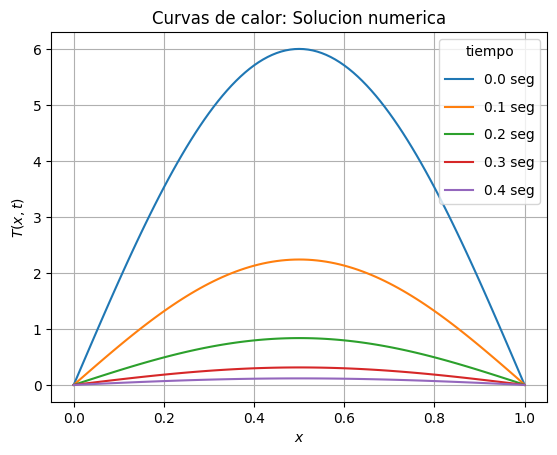

In [20]:
params={'legend.fontsize':5,'legend.handlength':1}

# labels
plt.xlabel(r'$x$')
plt.ylabel(r'$T(x,t)$')
plt.title("Curvas de calor: Solucion numerica")

# dominio
X = np.linspace(a,b,w.shape[0])
for j in range(0, nt, 10000):
    t=j*dt
    plt.plot(X, w[:, j], label=str(round(t,1)) + ' seg')
    plt.legend(labelspacing=1, title="tiempo")

plt.grid()
plt.show()



## Error con respecto a la solucion analitica
$$u(x,t) = 6 \sin \left ( \frac{\pi x}{L} \right ) \mathrm{e}^{-\frac{1}{\alpha} \left ( \frac{\pi}{L}  \right )^2 t} $$

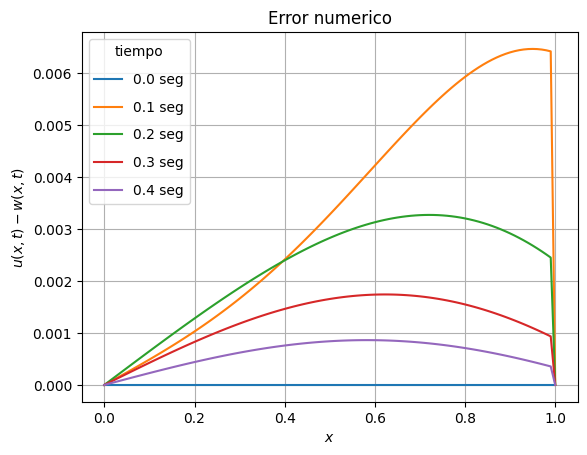

In [22]:
def u(x,t):
    return 6*np.sin(np.pi*x/L)*np.exp(-(1/alpha)*(np.pi/L)**2*t)

nt=40001
dt=0.00001
Nt=int(nt/10000) + 1
dx = (b-a)/(nx-1)

error = np.zeros( (nx, Nt))
k=0
for j in range(0, nt, 10000):
    t = j*dt
    for i in range(nx):
        x=i*dx
        error[i,k] = w[i,j] - u(x,t)
    k += 1

# graficamos el error
params={'legend.fontsize':5,'legend.handlength':1}

plt.xlabel(r'$x$')
plt.ylabel(r'$u(x,t) - w(x,t)$')
plt.title("Error numerico")

X = np.linspace(a,b,nx)
Dt=0.1
for  j in range(0, Nt):
    t=j*Dt
    plt.plot(X, error[:,j], label=str(round(t,1)) + ' seg')
    plt.legend(labelspacing=1, title="tiempo")

plt.grid()
plt.show()

### Aunque el metodo implicito es incondicionalmente estable, esto no garantiza precision


dimensions of w (101, 5)
dimensions of X (101,)
dimensions of t (5,)
gamma 1000.0


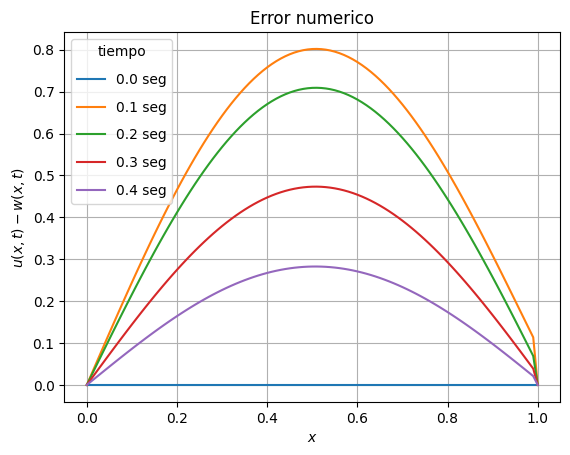

In [23]:
nt=5
dt=0.1
dx=(b-a)/(nx-1)
w = solu_eq_calor_implicit(alpha, t0, a,b,nt,nx,dt,f)

error = np.zeros( (nx, nt))
k=0
for j in range(nt):
    t = j*dt
    for i in range(nx):
        x=i*dx
        error[i,k] = w[i,j] - u(x,t)
    k += 1

# graficamos error
params={'legend.fontsize':5,'legend.handlength':1}

plt.xlabel(r'$x$')
plt.ylabel(r'$u(x,t) - w(x,t)$')
plt.title("Error numerico")

X = np.linspace(a,b,nx)
for  j in range(Nt):
    t=j*dt
    plt.plot(X, error[:,j], label=str(round(t,1)) + ' seg')
    plt.legend(labelspacing=1, title="tiempo")

plt.grid()
plt.show()

## Metodo de Crank-Nicolson:
En la seccion anterior la precision era del orden $\mathcal{O}(\Delta t)$ en tiempo. Esta precision no es muy buena.
John Crank y Phyllis Nicolson publicaron en 1947 un metodo que mejora la precision de los algoritmos anteriores.

La idea se basa en el siguiente analisis

Comenzamos con la discretizacion de la ecuacion de calor FTCS:

$$\frac{w_{i j+1} - w_{i j}}{\Delta t} = \alpha \frac{w_{i+1 j}- 2 w_{ij} + w_{i-1 j}}{\Delta x^2} + \mathcal{O}(\Delta x^2) - u_{tt}(c_1) \Delta t \tag{1} $$
donde $c_1 \in [t_j, t_{j+1}]$, el error en tiempo es

$$\epsilon_{fcst} = -\frac{1}{2} u_{tt}(c_t) \Delta t $$

La discretizacio regresiva en tiempo y centrada en espacio (BTCS) se puede escribir como


$$\frac{w_{i j+1} - w_{i j}}{\Delta t} = \alpha \frac{w_{i+1 j+1}- 2 w_{ij+1} + w_{i-1 j+1}}{\Delta x^2} + \mathcal{O}(\Delta x^2) - u_{tt}(c_1) \Delta t \tag{2}$$

De la ecuacion (1)
$$\frac{w_{i j+1} - w_{ij}}{\Delta t} = \alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2} $$
De la ecuacio (2)
$$\frac{w_{i j+1} - w_{ij}}{\Delta t} = \alpha \frac{w_{i+1 j+1} - 2 w_{ij+1} + w_{i-1 j+1}}{\Delta x^2} $$

Ambos sistemas se pueden escribir en una sola formula


$$\frac{w_{i j+1} - w_{ij}}{\Delta t} = S \alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2}  + (1 -S) \alpha \frac{w_{i+1 j+1} - 2 w_{ij+1} + w_{i-1 j+1}}{\Delta x^2} $$


Si $S=0$ se tiene la segunda, si $S=1$ la primera y si $S=1/2$
esto fue lo que hicieron Crank-Nicolson.

$$2 \frac{w_{i j+1} - w_{ij}}{\Delta t} =  \alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2}  +  \alpha \frac{w_{i+1 j+1} - 2 w_{ij+1} + w_{i-1 j+1}}{\Delta x^2} + \mathcal{O}(\Delta x^2) + u_{tt}(c_2) \Delta t - u_{tt}(c_1) \Delta t$$





donde $c_1, c_2$ son numeros en el intervalor $[t, t_j + \Delta t]$

Usando el teorema del valor medio encontramos que existe in $c \in [t_j , t_j + \Delta t]$ tal que

$$u_{tt}(c_2) - u_{tt}(c_1) = u_{ttt}(c) \Delta t $$
Entonces escribimos

$$2 \frac{w_{i j+1} - w_{ij}}{\Delta t} =  \alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2}  +  \alpha \frac{w_{i+1 j+1} - 2 w_{ij+1} + w_{i-1 j+1}}{\Delta x^2} + \mathcal{O}(\Delta x^2) + u_{ttt}(c) \Delta t^2 $$

La formula que se implementa es:

$$\frac{w_{i j+1} - w_{ij}}{\Delta t} =  \alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{ 2 \Delta x^2}  +  \alpha \frac{w_{i+1 j+1} - 2 w_{ij+1} + w_{i-1 j+1}}{2 \Delta x^2} $$

Reordenamos de fomra que los terminos a la izquierda son $j+1$
y a la derecha $j$


$$-\beta w_{i-1 j+1} + (1 + 2 \beta) w_{i j+1} - \beta w_{i+1 j+1} = \beta w_{i-1 j} + (1 - 2 \beta) w_{ij} + \beta w_{i+1 j} $$
donde

$\beta= \alpha \Delta t/(2 \Delta x^2)$, con error de
$$\mathcal{O}(\Delta x^2) + \mathcal{O}(\Delta t^2) $$

La molecula en la proxima figura.







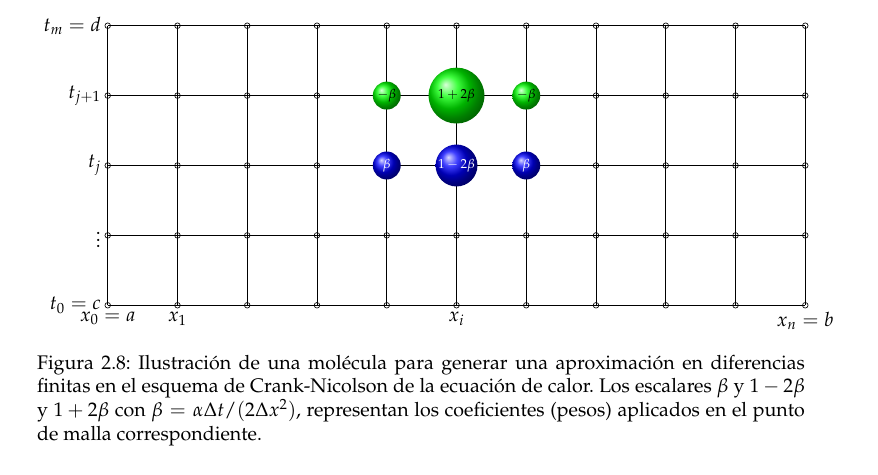

En la clase siguiente:

* Encontrar la representacion matricial
* Probar estabilidad
* Implementar el codigo en Python
* otros.